In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 8
%matplotlib inline

In [2]:
# ! pip install geopandas

Ноутбук посвящен работе с геоданными с помощью библиотек shapely и geopandas. 

### Знакомство с shapely

`Shapely` - библиотека для работы с геометрическими объектами

`Geopandas` - pandas, только с гео

`folium` - для визуализации

In [3]:
from shapely.geometry import Point, LineString, Polygon

#### точка

In [4]:
moscow_lon = 37.618423
moscow_lat = 55.751244
point = Point(moscow_lon, moscow_lat)

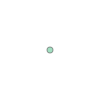

In [5]:
point

In [6]:
print("area ", point.area) # площадь
print("length ", point.length) # длинна

area  0.0
length  0.0


In [7]:
point.bounds #границы точки

(37.618423, 55.751244, 37.618423, 55.751244)

#### Линия

In [8]:
moscow_lon = 37.618423
moscow_lat = 55.751244

piter_lon = 30.26417
piter_lat = 59.89444

line = LineString([(moscow_lon, moscow_lat), (piter_lon, piter_lat)])

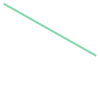

In [9]:
line

bounds - (minx, miny, maxx, maxy) 

In [10]:
line.bounds

(30.26417, 55.751244, 37.618423, 59.89444)

In [11]:
list(line.coords) # координаты точек

[(37.618423, 55.751244), (30.26417, 59.89444)]

#### Полигон

https://boundingbox.klokantech.com/ - сайт для создания bounding box города


In [12]:
polygon = Polygon([(37.3193289,55.489927), 
                   (37.9456611,55.489927),
                   (37.9456611,56.009657),
                   (37.3193289,56.009657)])
print(polygon.area)
print(polygon.length)

0.32552363430599734
2.2921243999999916


In [13]:
[[[36.80310116,55.14217447],[37.96742764,55.14217447],[37.96742764,56.02122372],[36.80310116,56.02122372],[36.80310116,55.14217447]]]

[[[36.80310116, 55.14217447],
  [37.96742764, 55.14217447],
  [37.96742764, 56.02122372],
  [36.80310116, 56.02122372],
  [36.80310116, 55.14217447]]]

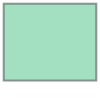

In [14]:
polygon

Границы полигона

In [15]:
list(polygon.exterior.coords)

[(37.3193289, 55.489927),
 (37.9456611, 55.489927),
 (37.9456611, 56.009657),
 (37.3193289, 56.009657),
 (37.3193289, 55.489927)]

In [16]:
list(polygon.interiors)

[]

### Операции с геометрией

<img src=http://docs.qgis.org/testing/en/_images/overlay_operations.png>

intersection

In [17]:
a = Point(0, 0).buffer(1.1)
b = Point(1, 1).buffer(0.7)

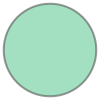

In [18]:
b

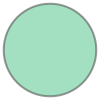

In [19]:
a

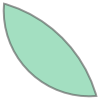

In [20]:
a.intersection(b)

union

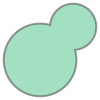

In [21]:
a.union(b)

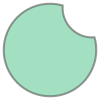

In [22]:
a.difference(b)

In [23]:
polygon.contains(Point(moscow_lon, moscow_lat))

True

In [24]:
polygon.contains(Point(piter_lon, piter_lat))

False

### Geopandas

In [25]:
geo_series = gpd.GeoSeries([Point(-120, 45), Point(-121.2, 46), Point(-122.9, 47.5)])
geo_series

0    POINT (-120.00000 45.00000)
1    POINT (-121.20000 46.00000)
2    POINT (-122.90000 47.50000)
dtype: geometry

In [26]:
geo_series.crs = {'init': 'epsg:4326'}

/home/recpi/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [27]:
moscow_districts = gpd.read_file('moscow_districts.geojson')
moscow_districts.head(3)

,ABBREV_AO,MEN18_27,MEN18_60,MENOLDER60,NAME,RETIREMENT,TOTALMEN,TOTALPOPUL,TOTALWOMEN,UNDER18,WOMEN18_55,WOMENOLDER,WORKING_AG,geometry
0,ЗАО,2550.0,15063.0,6621.0,Филёвский Парк,24272.0,26066.0,62378.0,36312.0,8474.0,14569.0,17651.0,29632.0,"POLYGON ((37.42765 55.74821, 37.42849 55.74875..."
1,ЗелАО,2277.0,11418.0,4116.0,Матушкино,15058.0,19196.0,44258.0,25062.0,6834.0,10948.0,10942.0,22366.0,"POLYGON ((37.17853 56.00795, 37.18083 56.00825..."
2,ЗАО,1054.0,5767.0,1614.0,Внуково,6399.0,9174.0,21378.0,12204.0,3436.0,5775.0,4785.0,11542.0,"MULTIPOLYGON (((37.18317 55.60565, 37.18455 55..."


In [28]:
moscow_districts.columns = moscow_districts.columns.str.lower()
moscow_districts.columns

Index(['abbrev_ao', 'men18_27', 'men18_60', 'menolder60', 'name', 'retirement',
       'totalmen', 'totalpopul', 'totalwomen', 'under18', 'women18_55',
       'womenolder', 'working_ag', 'geometry'],
      dtype='object')

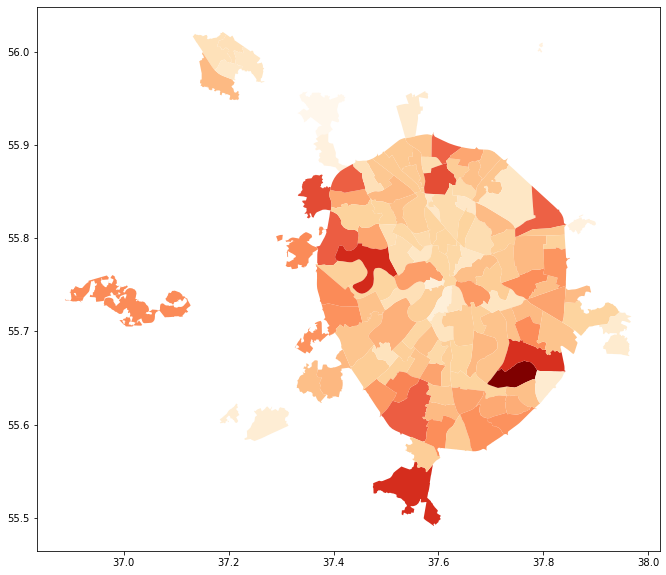

In [29]:
moscow_districts.plot('totalpopul', figsize=(12,10), cmap='OrRd');

#### OpenStreetMap

Скачаем данные по местам из OpenStreetMap на примере Москвы

https://wiki.openstreetmap.org/wiki/Main_Page

`node` - точка, параметры широта и долгота

`way` - линейные объекты, например улица, дорога

`relation` - отношение, для связи между объектами

In [30]:
import requests

In [31]:
24.55017,59.351808,24.926283,59.591577
36.8031,55.1422,37.9674,56.0212
43.5986,56.0599,44.5764,56.608

(43.5986, 56.0599, 44.5764, 56.608)

In [32]:
overpass_url = "https://overpass.kumi.systems/api/interpreter"

overpass_query = """
[out:json];
(
 node["shop"](55.4245,37.0919,56.0671,38.1335);
);
out body;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()

In [33]:
data

{'version': 0.6,
 'generator': 'Overpass API 0.7.57.1 74a55df1',
 'osm3s': {'timestamp_osm_base': '2022-04-26T07:24:10Z',
  'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'},
 'elements': [{'type': 'node',
   'id': 1000,
   'lat': 55.9951147,
   'lon': 37.2075319,
   'tags': {'comment': 'ООО "АСП-ГРУПП", ИНН 7735108290, до 22:45 c 2014-05-23',
    'name': 'Десяточка',
    'opening_hours': '08:30-22:45',
    'shop': 'supermarket'}},
  {'type': 'node',
   'id': 245868628,
   'lat': 55.9131682,
   'lon': 37.3961899,
   'tags': {'addr:city': 'Химки',
    'addr:housenumber': 'к4',
    'addr:postcode': '141410',
    'addr:street': 'микрорайон ИКЕА',
    'brand': 'Ашан',
    'brand:en': 'Auchan',
    'brand:ru': 'Ашан',
    'brand:wikidata': 'Q758603',
    'brand:wikipedia': 'ru:Auchan',
    'contact:facebook': 'https://www.facebook.com/AuchanRussia',
    'contact:instagram': 'https://www.instagram.com/auchan.ru/',
    'co

In [34]:
def get_tag(x, key_name):
    if str(key_name) in x:
        tmp = x[key_name]
        return tmp
    else:
        return "unknown"

In [35]:
loaded = pd.DataFrame(data['elements'])
loaded['shop'] = loaded['tags'].apply(lambda x: get_tag(x, 'shop'))

In [36]:
loaded.head()

,type,id,lat,lon,tags,shop
0,node,1000,55.995115,37.207532,"{'comment': 'ООО ""АСП-ГРУПП"", ИНН 7735108290, ...",supermarket
1,node,245868628,55.913168,37.396190,"{'addr:city': 'Химки', 'addr:housenumber': 'к4...",supermarket
2,node,245869056,55.912037,37.392914,"{'addr:city': 'Химки', 'addr:housenumber': 'к3...",doityourself
3,node,245942565,55.656054,38.068889,"{'amenity': 'fuel', 'fuel:diesel': 'yes', 'fue...",yes
4,node,249300822,55.634668,37.770433,"{'addr:housenumber': '20 к1', 'addr:street': '...",yes


#### Создание geodataframe

In [37]:
crs = {'init' :'epsg:4326'}
geometry = [Point(xy) for xy in zip(loaded.lon, loaded.lat)]
places_geo = gpd.GeoDataFrame(loaded, crs=crs, geometry=geometry)

/home/recpi/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [38]:
places_geo.head()

,type,id,lat,lon,tags,shop,geometry
0,node,1000,55.995115,37.207532,"{'comment': 'ООО ""АСП-ГРУПП"", ИНН 7735108290, ...",supermarket,POINT (37.20753 55.99511)
1,node,245868628,55.913168,37.396190,"{'addr:city': 'Химки', 'addr:housenumber': 'к4...",supermarket,POINT (37.39619 55.91317)
2,node,245869056,55.912037,37.392914,"{'addr:city': 'Химки', 'addr:housenumber': 'к3...",doityourself,POINT (37.39291 55.91204)
3,node,245942565,55.656054,38.068889,"{'amenity': 'fuel', 'fuel:diesel': 'yes', 'fue...",yes,POINT (38.06889 55.65605)
4,node,249300822,55.634668,37.770433,"{'addr:housenumber': '20 к1', 'addr:street': '...",yes,POINT (37.77043 55.63467)


### Spatial join

проверка проекций - у двух датафреймов они должны совпадать

In [39]:
moscow_districts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [40]:
places_geo.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [41]:
places_district = gpd.sjoin(moscow_districts, places_geo, how="inner", op='contains')

/home/recpi/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-41-1cf444394c5b>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: +init=epsg:4326 +type=crs

  places_district = gpd.sjoin(moscow_districts, places_geo, how="inner", op='contains')


In [42]:
places_district.head()

,abbrev_ao,men18_27,men18_60,menolder60,name,retirement,totalmen,totalpopul,totalwomen,under18,...,womenolder,working_ag,geometry,index_right,type,id,lat,lon,tags,shop
0,ЗАО,2550.0,15063.0,6621.0,Филёвский Парк,24272.0,26066.0,62378.0,36312.0,8474.0,...,17651.0,29632.0,"POLYGON ((37.42765 55.74821, 37.42849 55.74875...",24883,node,4958136292,55.763153,37.495078,"{'addr:city': 'Москва', 'addr:housenumber': '2...",supermarket
0,ЗАО,2550.0,15063.0,6621.0,Филёвский Парк,24272.0,26066.0,62378.0,36312.0,8474.0,...,17651.0,29632.0,"POLYGON ((37.42765 55.74821, 37.42849 55.74875...",10439,node,3068074961,55.764303,37.494623,{'shop': 'convenience'},convenience
0,ЗАО,2550.0,15063.0,6621.0,Филёвский Парк,24272.0,26066.0,62378.0,36312.0,8474.0,...,17651.0,29632.0,"POLYGON ((37.42765 55.74821, 37.42849 55.74875...",1718,node,971038601,55.742992,37.511425,{'shop': 'car_repair'},car_repair
0,ЗАО,2550.0,15063.0,6621.0,Филёвский Парк,24272.0,26066.0,62378.0,36312.0,8474.0,...,17651.0,29632.0,"POLYGON ((37.42765 55.74821, 37.42849 55.74875...",32982,node,6064284540,55.744523,37.512168,{'shop': 'vacant'},vacant
0,ЗАО,2550.0,15063.0,6621.0,Филёвский Парк,24272.0,26066.0,62378.0,36312.0,8474.0,...,17651.0,29632.0,"POLYGON ((37.42765 55.74821, 37.42849 55.74875...",9550,node,2883190166,55.744799,37.514955,"{'email': 'info@central-ppk.ru', 'fax': '+7 49...",ticket


In [43]:
places_district['shop_count'] = places_district.groupby('name')['id'].transform('nunique')

In [44]:
district_stats = places_district[['name','geometry', 'shop_count', 'totalpopul']].drop_duplicates('name')#

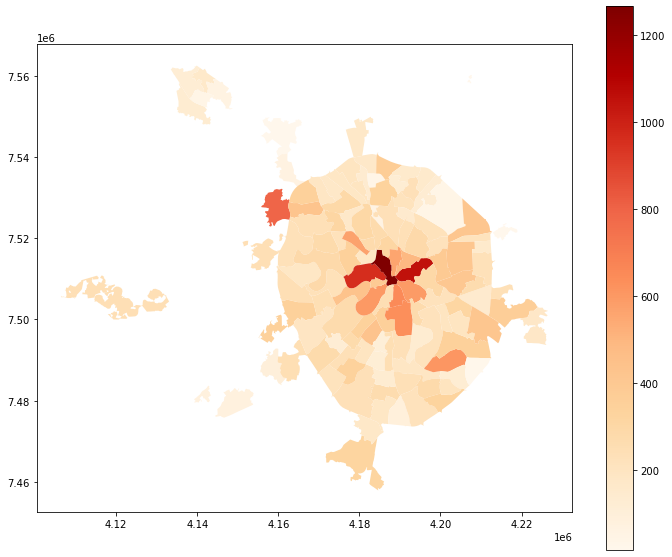

In [51]:
district_stats.plot('shop_count', cmap='OrRd', figsize=(12,10), scheme='equals',legend=True);

In [ ]:
# ! pip install mapclassify==2.4.0

In [ ]:
# ! pip install --upgrade  pysal==1.14.4

In [ ]:
# !pip install geopandas==0.4.0

# !pip install mapclassify

# !pip install pysal==2.0.0

# !pip install -U --no-deps mapclassify git+git://github.com/geopandas/geopandas.git@master

Изменим проекцию на Pseudo-Mercator EPSG:3857

In [46]:
district_stats = district_stats.to_crs(epsg=3857)

ValueError: Invalid scheme. Scheme must be in the set: dict_keys(['boxplot', 'equalinterval', 'fisherjenks', 'fisherjenkssampled', 'headtailbreaks', 'jenkscaspall', 'jenkscaspallforced', 'jenkscaspallsampled', 'maxp', 'maximumbreaks', 'naturalbreaks', 'quantiles', 'percentiles', 'stdmean', 'userdefined'])

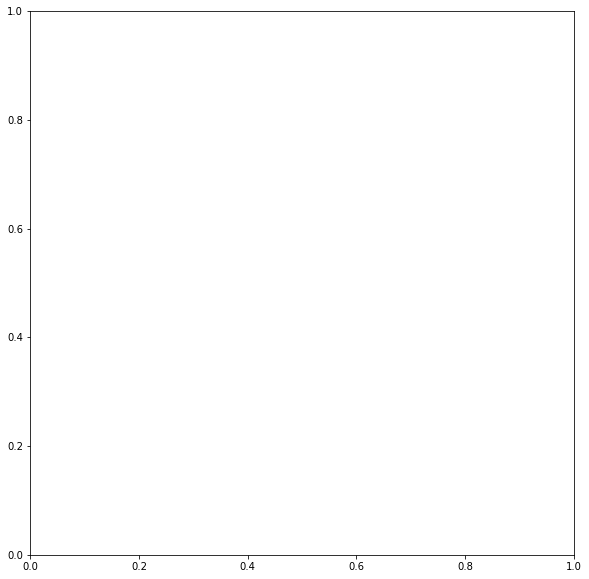

In [52]:
district_stats.plot('shop_count', cmap='OrRd', figsize=(12,10), scheme='equals', legend=True);

<AxesSubplot:>

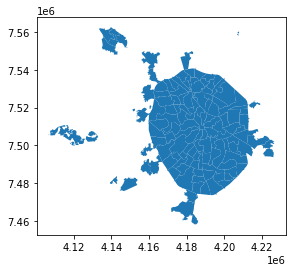

In [49]:
district_stats.plot()